## BSA - $\epsilon(\lambda)$ according to [Pahn. et.al 2013](https://aip.scitation.org/doi/abs/10.1063/1.4826514)


They use Lorentz oscillators to get the dielectric constant of Bovine Serum Albumina as a function of the wavelngth. 

\begin{equation}
    \epsilon_{protein}(\lambda) = 1 + \sum_j{\frac{1/{\Lambda_j}^2}
    {1/{\lambda_j}^2 -i/(\lambda\gamma_j) - 1/{\lambda}^2}}
\end{equation}

Where:

* $\Lambda_1 = 10853.54 $ nm
* $\Lambda_2 = 878.5 $ nm
* $\Lambda_3 = 92.6 $ nm
* $\Lambda_4 = 82.81 $ nm
-------------------------
* $\gamma_1 = \infty $ nm
* $\gamma_2 = 2484.52 $ nm
* $\gamma_3 = 155.28 $ nm
* $\gamma_4 = 65.38 $ nm
--------------------------
* $\lambda_1 = 6059.8 $ nm
* $\lambda_2 = 194.1 $ nm
* $\lambda_3 = 99.38 $ nm
* $\lambda_4 = 57.78 $ nm


Let's avoid the problems that $\gamma_1= \infty$ might cause when computing the function by separating that term and setting the $1/\gamma_1=0$. 

Then our equation will look like:

\begin{equation}
    \epsilon_{protein}(\lambda) = 1 + \frac{1/{\Lambda_1}^2}
                                {1/{\lambda_1}^2 - 1/{\lambda}^2} +
                                \sum_{j=2}^{4}{\frac{1/{\Lambda_j}^2}
                                {1/{\lambda_j}^2 -i/(\lambda\gamma_j) - 1/{\lambda}^2}}
\end{equation}

In [1]:
import numpy

In [2]:
#define _1 variables
Lambda_1 = 10853.54
lambda_1 = 6059.8

In [3]:
#define the rest (2-4) as an array

Lambda_array = numpy.array([878.5, 92.6, 82.81])
gamma_array = numpy.array([2484.52, 155.28, 65.38])
lambda_array = numpy.array([194.1, 99.38, 57.78])

#Let's use the version 1/ thing so it's less confusing

sigma_array = 1/Lambda_array
alpha_array = 1/gamma_array
f_array = 1/lambda_array

\begin{equation}
    \epsilon_{protein}(\lambda) = 1 + \frac{{\sigma_1}^2}
                                {{f_1}^2 - 1/{\lambda}^2} +
                                \sum_{j=2}^{4}{\frac{{\sigma_j}^2}
                                {{f_j}^2 -i\alpha_j/\lambda - 1/{\lambda}^2}}
\end{equation}

In [4]:
def protein_dielectric(lamb, Lambda_1, lambda_1, Lambda_array, lambda_array, gamma_array):
    '''Computes the value of dielectric constant of a protein for a certain
       wavelength. It uses Lorentz oscillators, obtained from Pahn, etal. 2013
       
    Arguments:
    ----------
    lamb        : float, wavelength in [nm] where we want to 
                         know the dielectric constant.
    Lambda_1    : float, Lorentz oscillator upper lambda 1. 
    lambda_1    : float, Lorentz oscillator lower lambda 1.
    Lambda_array: array of floats, Lorentz oscillator upper lambda 2,3,4.
    lambda_array: array of floats, Lorentz oscillator lower lambda 2,3,4.
    gamma_array : array of floats, Lorentz oscillator gamma 2,3,4.
    
    Returns:
    --------
    epsilon: complex, dielectric constant.
    '''
    #Let's use the version 1/ thing so it's less confusing
    sigma_1 = 1/Lambda_1
    f_1 = 1/lambda_1
    
    sigma_array = 1/Lambda_array
    alpha_array = 1/gamma_array
    f_array = 1/lambda_array
    
    
    epsilon = 1 + sigma_1**2/(f_1**2 - (1/lamb**2)) + numpy.sum(
                            sigma_array**2/(f_array**2 - 
                                            1j*alpha_array/lamb 
                                          - (1/lamb**2)))
    
    return epsilon

In [5]:
lamb = numpy.linspace(0.5,600,201)

In [6]:
epsilon = numpy.zeros(len(lamb), dtype=numpy.complex128)

In [7]:
for i in range(len(lamb)):
    epsilon[i] = protein_dielectric(lamb[i], Lambda_1, lambda_1, Lambda_array, lambda_array, gamma_array)
    

In [8]:
from matplotlib import pyplot
%matplotlib inline

In [9]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['axes.linewidth'] = 2

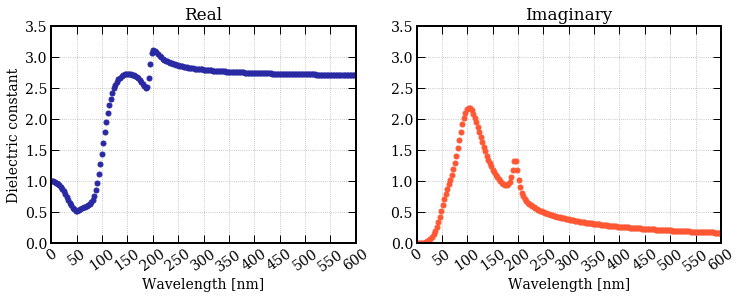

In [10]:
pyplot.figure(figsize=(12,4))  

pyplot.subplot(121)

pyplot.plot(lamb,epsilon.real,ls='', marker='o', color='#2929a3', ms=5) 

pyplot.xlabel('Wavelength [nm]')
pyplot.ylabel('Dielectric constant')
pyplot.xlim(min(lamb), max(lamb))
pyplot.ylim(0, 3.5)

pyplot.xticks(numpy.linspace(0, max(lamb), 13), rotation=35)
pyplot.tick_params(axis='both', length=8, width=1, direction='in')
pyplot.title('Real')
pyplot.grid(linestyle=':')


pyplot.subplot(122)

pyplot.plot(lamb,epsilon.imag, ls='', marker='o', color='#ff5733', ms=5) 

pyplot.xlabel('Wavelength [nm]')
#pyplot.ylabel('Refractive index')
pyplot.xlim(min(lamb), max(lamb))
pyplot.ylim(0, 3.5)
pyplot.xticks(numpy.linspace(0, max(lamb), 13), rotation=35)
pyplot.tick_params(axis='both', length=8, width=1, direction='in')
pyplot.title('Imaginary')
pyplot.grid(linestyle=':')

To run the example lspr_7spheres we want to know the value of epsilon when the wavelength is 380 nm. 

In [11]:
eps_380 = protein_dielectric(380, Lambda_1, lambda_1, Lambda_array, lambda_array, gamma_array)
print('lambda = {}, epsilon_protein = {}'.format(380, eps_380))    

lambda = 380, epsilon_protein = (2.751434851700645+0.2860230708531996j)
